## Import Dependencies 

In [2]:
from IPython.display import clear_output
from time import sleep
import random
import gym
import itertools 
import matplotlib.pyplot as plt  
import matplotlib.style 
import numpy as np 
import pandas as pd 
import sys 

### Load the Envirenement 

In [3]:
#showing the envirenement
env = gym.make("Taxi-v3")
#pour afficher notre envirenement
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



## Initialize the Envirenement 

In [4]:
# initializing the envirenement 
env.reset() # reset environment to a new, random state
env.render()
# Show action space and state space 
print("Action Space :", env.action_space.n)
print("State Space :", env.observation_space.n)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space : 6
State Space : 500


## Building the Random Agent

In [5]:
#Build the Random agent 
def random_agent():
    env.s = 328
    epochs = 0
    penalties, reward = 0, 0
    rewards=0
    global frames 
    frames= []
    done = False
    while not done:
        # take a random action every timestep 
        action = env.action_space.sample()

        state, reward, done, info = env.step(action)
        rewards += reward
        if reward == -10:
            penalties += 1
        # Put each rendered frame into dict for animation
        frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        })
        #incremente timesteps 
        epochs += 1
        #if done==True:
            #break
        
    return (epochs,penalties,rewards)
# create an agent 
rand_agent=random_agent()
print("Timesteps taken: {}".format(rand_agent[0]))
print("Penalties: {}".format(rand_agent[1]))
print("Rewards: {}".format(rand_agent[2]))


Timesteps taken: 200
Penalties: 66
Rewards: -794


In [6]:
# Show the comportement of the ranfom agent 
for i, frame in enumerate(frames):
    clear_output(wait=True)
    print(frame['frame'])
    print(f"Timestep: {i + 1}")
    print(f"State: {frame['state']}")
    print(f"Action: {frame['action']}")
    print(f"Reward: {frame['reward']}")
    sleep(.1)
        

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 949
State: 0
Action: 5
Reward: 20


### Initializing Q_Table with Zeros 

In [6]:
#showing the q-table and initilize it with zeros 

action_space=env.action_space.n
observation_space =env.observation_space.n
qtable = np.zeros((observation_space, action_space))
print(qtable)
#show the intialized Q-Table
print(qtable.shape)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
(500, 6)


## Training the Q-Learning Agent

In [7]:
# Define Hyperparameters
alpha = 0.1 #Learning rate 
gamma = 0.6 #discount factor 
epsilon = 1.0 #epslion for greedy policy 
max_epsilon=1.0 #max epsilon 
min_epsilon = 0.01 #min value 
epsilon_decay= 0.05 # decaying epsilon after exploration 
total_episodes =10000 #number of episodes to train our agent 
# Build Q-Learning agent 
def qlearning_agent(alpha, gamma,epsilon,max_epsilon,min_epsilon,epsilon_decay,total_episodes):
    epochs,rewards,penalties ,episodes =0,0,0,0
    for i in range(total_episodes):
        state = env.reset()
        done = False
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Exploration 
            else:
                action = np.argmax(qtable[state]) # Exploitation 

            next_state, reward, done, info = env.step(action) 
            rewards+=reward 
            old_value = qtable[state, action]
            next_max = np.max(qtable[next_state])

           # Bellman equation for updating q values :
            qtable[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            #pass to next state 
            state = next_state
            #grab penalties 
            if reward ==-10:
                penalties += 1
            epochs += 1

            if done==True:
                break
        #decaying epsilon to do less exploration :
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-epsilon_decay*i)

    return qtable

In [15]:
q_table=qlearning_agent(alpha, gamma,epsilon,max_epsilon,min_epsilon,epsilon_decay,total_episodes)
print("Training the agent is Finished within {} \n".format(total_episodes))
#show the q_table 
print("Q Table after Training the Q learning agent:\n ")
print(q_table)
print(q_table.shape)      

Training the agent is Finished within 10000 

Q Table after Training the Q learning agent:
 
[[  0.           0.           0.           0.           0.
    0.        ]
 [  1.67740461   2.79336047   2.72785926  -3.77197633   5.20997639
  -11.25552235]
 [  7.17534318   7.74300174   7.89840805   9.15501947  10.9512375
    0.28451338]
 ...
 [ -1.19899269  12.5800962   -1.19899269  -1.22734628  -1.96
   -3.53582637]
 [ -2.82999637  -2.85315946  -2.82999637  -3.01835777  -2.8816
   -2.85891633]
 [ 13.65827276   1.29468472  13.70298742  17.99999943   4.22871544
    4.84052276]]
(500, 6)


## Test the Q_Learning Agent after Training

In [16]:
# Testing the Q learning agent within the 100 episodes 
total_epochs, total_penalties,reward =0, 0, 0
qlearning_rewards=[]
episodes = 100
#go through 100 episodes 
for i in range(episodes):
    state = env.reset()
    epochs, penalties, rewards = 0, 0, 0
    done = False
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)
        rewards+=reward
        if reward == -10:
            penalties += 1

        epochs += 1
        
        if done==True:
            break
    qlearning_rewards.append(rewards)
    total_penalties += penalties
    total_epochs += epochs
#showing the results 
print("Total rewards per episode :" , sum(qlearning_rewards)/100)
print("Total penalties per episode :" , penalties/100)
print("total timesteps per episode :" , total_epochs/100)

Total rewards per episode : 7.79
Total penalties per episode : 0.0
total timesteps per episode : 13.21


In [17]:
print(qlearning_rewards)

[4, 8, 9, 5, 5, 9, 8, 4, 10, 8, 8, 12, 4, 11, 12, 9, 13, 4, 3, 4, 10, 6, 5, 13, 9, 9, 10, 10, 8, 13, 7, 9, 5, 3, 8, 9, 8, 5, 4, 9, 4, 10, 9, 10, 11, 8, 6, 4, 10, 4, 6, 9, 10, 9, 11, 6, 6, 4, 9, 9, 7, 11, 8, 15, 6, 7, 10, 5, 8, 6, 5, 11, 8, 6, 7, 7, 5, 8, 11, 11, 11, 10, 5, 8, 11, 6, 6, 4, 12, 6, 3, 8, 10, 10, 12, 5, 5, 6, 9, 5]


### Training  SARSA  Agent 

In [10]:
# traing SARSA agent 
#Defining the different parameters 
epsilon = 0.9
total_episodes = 10000
max_steps = 100 # max timesteps per episode
alpha = 0.85
gamma = 0.95
reward=0
epochs=0
max_steps=100
#Initializing the Q-matrix 
s_table = np.zeros((env.observation_space.n, env.action_space.n)) 
#Function to choose the next action 
def choose_action(state): 
    action=0
    if np.random.uniform(0, 1) < epsilon: 
        action = env.action_space.sample() 
    else: 
        action = np.argmax(s_table[state, :]) 
    return action 
  
#Function to learn the Q-value 
def update(state, state2, reward, action, action2): 
    target = reward + gamma * s_table[state2, action2] 
    s_table[state, action] = s_table[state, action] + alpha * (target - s_table[state, action]) 

#Initializing the reward 
# Starting the SARSA learning
for episode in range(total_episodes): 
    current_state = env.reset() 
    current_action = choose_action(current_state)
    t=0
    while t<max_steps: 
        #Getting the next state 
        next_state, reward, done, info = env.step(current_action) 
        #Choosing the next action 
        next_action = choose_action(next_state) 
        #Learning the Q-value 
        update(current_state, next_state, reward, current_action, next_action) 

        current_state = next_state 
        current_action = next_action 

        #Updating the respective vaLues 
        t += 1
        #If at the end of learning process 
        if done==True: 
            break
print("Q_table after training \n:",s_table)


Q_table after training 
: [[  0.           0.           0.           0.           0.
    0.        ]
 [-64.38017183 -71.94492412 -63.69131045 -62.03507932 -68.18052858
  -66.52484213]
 [-52.7678214  -56.61157335 -72.80776059 -52.99884093 -55.55909851
  -65.63037646]
 ...
 [-60.65068242 -52.64676924 -74.14994062 -50.70798084 -63.53208465
  -65.83420734]
 [-67.76424664 -60.00914821 -55.71693166 -55.76085138 -75.36032565
  -61.27920336]
 [-45.10605881 -61.59428488 -51.83743287   8.00340082 -53.99158949
  -50.70972254]]


### Testing SARSA  Agent 

In [11]:
#Testing the agent 
# Testing the Q learning agent within the 100 episodes 
total_epochs, total_penalties,reward =0, 0, 0
sarsa_rewards=[]
episodes = 100
#go through 100 episodes 
for i in range(episodes):
    state = env.reset()
    epochs, penalties, rewards = 0, 0, 0
    done = False
    while not done:
        action = np.argmax(s_table[state])
        state, reward, done, info = env.step(action)
        rewards+=reward
        if reward == -10:
            penalties += 1

        epochs += 1
        
        if done==True:
            break
    sarsa_rewards.append(rewards)
    total_penalties += penalties
    total_epochs += epochs
#showing the results 
print("Total rewards per episode :" , sum(sarsa_rewards)/100)
print("Total penalties per episode :" , penalties/100)
print("total timesteps per episode :" , total_epochs/100)

Total rewards per episode : -271.28
Total penalties per episode : 0.0
total timesteps per episode : 200.0


## Test the Random Agent for Comparison 

In [27]:
#Testing the random agent within the 100 episodes 
total_epochs, total_penalties , reward = 0, 0, 0
random_rewards=[]
episodes = 100
for i in range(episodes):
    state = env.reset()
    epochs, penalties, r_rewards = 0, 0, 0
    done = False
    while not done:
        action = env.action_space.sample()
        state, reward, done, info = env.step(action)
        r_rewards+=reward
        if reward == -10:
            penalties += 1
        epochs += 1
        
        if done==True:
            break    
    random_rewards.append(r_rewards)
    total_penalties += penalties
    total_epochs += epochs
# showing the results 
print("Total Rewards per episode :" ,sum(random_rewards)/100)
print(" Total Penalties per episode :" , penalties/100)
print(" Taken Timesteps per episode :", epochs/100)

Total Rewards per episode : -750.74
 Total Penalties per episode : 0.73
 Taken Timesteps per episode : 2.0


In [30]:
print(random_rewards)
len(random_rewards)

[-785, -821, -857, -280, -713, -704, -740, -839, -526, -749, -704, -830, -641, -785, -785, -740, -767, -848, -794, -605, -785, -776, -803, -767, -812, -893, -812, -740, -839, -749, -767, -758, -722, -785, -740, -704, -722, -785, -776, -695, -456, -632, -704, -749, -740, -875, -821, -713, -884, -821, -749, -695, -776, -830, -686, -839, -767, -740, -821, -803, -848, -683, -830, -839, -740, -704, -668, -857, -731, -677, -749, -776, -201, -704, -794, -848, -812, -668, -713, -884, -758, -812, -740, -704, -821, -659, -749, -821, -821, -650, -821, -857, -677, -740, -704, -812, -767, -758, -776, -857]


100

## Visualisation :
   #### A: Q-Learning Agent 



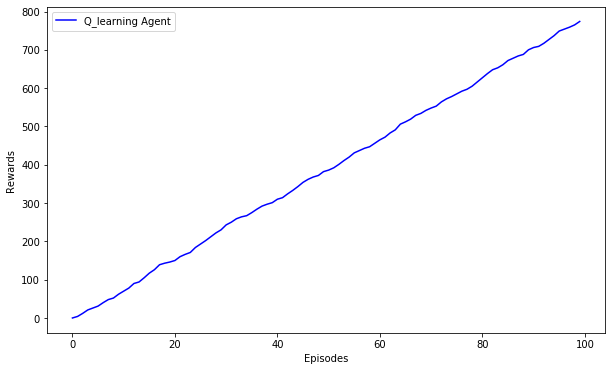

In [18]:
#define a function to compute cummulative rewards 
def cumulative_sum(lst):
    total, result = 0, []
    for ele in lst:
        result.append(total)
        total += ele
    return result
#get a list of 100 episodes  
episodes =[episode for episode in range(episodes)]
# plot the results 
cummulative_qlearning_rewards=cumulative_sum(qlearning_rewards)
plt.figure(figsize=(10,6))
plt.plot(episodes,cummulative_qlearning_rewards, label="Q_learning Agent",color='blue')
plt.ylabel("Rewards ")
plt.xlabel("Episodes")
plt.legend()
plt.savefig('Q_Learning_agent')

As the plot shows above, the Q-Learning agent, during the test phase behaved very well. The results above shows that the Q-Learning agent is always improving in terms of rewards. The agent learned to choose the right path to take by reducing the number of steps to make a good passenger depot. This means that the agent learns from his environment.

#### B:SARSA  Agent 

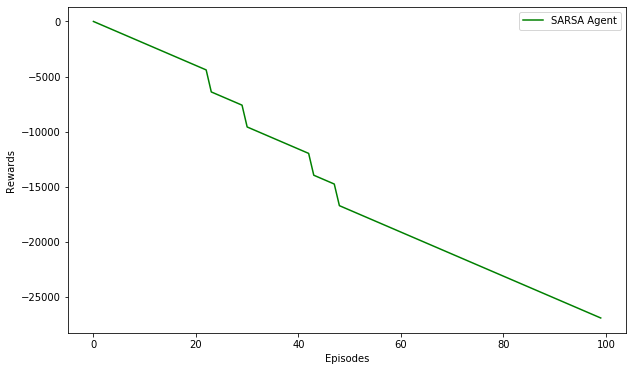

In [20]:
# Define a function that will cummulate rewards 
cummulative_sarsa_rewards=cumulative_sum(sarsa_rewards)
plt.figure(figsize=(10,6))
plt.plot(episodes,cummulative_sarsa_rewards, label="SARSA Agent",color='green')
plt.ylabel("Rewards ")
plt.xlabel("Episodes")
plt.legend()
plt.savefig('SARSA_agent')

#### B: Random Agent :

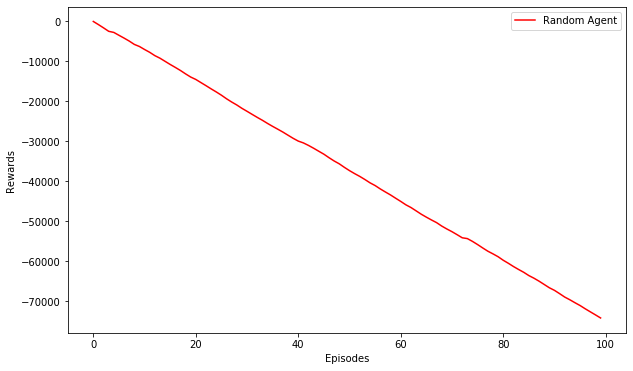

In [31]:
# Define a function that will cummulate rewards 
cummulative_random_rewards=cumulative_sum(random_rewards)
episodes =[episode for episode in range(episodes)]
plt.figure(figsize=(10,6))
plt.plot(episodes,cummulative_random_rewards, label="Random Agent",color='red')
plt.ylabel("Rewards ")
plt.xlabel("Episodes")
plt.legend()
plt.savefig('random_agent')

We note that, from the graph above, when the agent behaves randomly, he receives only penalties, after each action taken. The agent's behavior decreases after each movement he takes . We see as a result at the end of the test phase that the agent cummulated a lot of penalties.